In [5]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import constants
from scipy.special import legendre, eval_legendre

## Legendre Polynomials

In [135]:
P = lambda l, x: eval_legendre(l, x)

In [4]:
for i in range(5):
    print(legendre(i))

 
1
 
1 x
     2
1.5 x - 0.5
     3
2.5 x - 1.5 x
       4             3        2
4.375 x + 4.857e-16 x - 3.75 x + 2.429e-16 x + 0.375


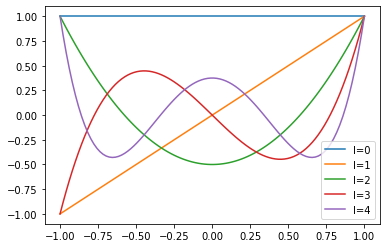

In [6]:
x = np.linspace(-1, 1, 100)
for i in range(5):
    plt.plot(x, eval_legendre(i, x), label=f'l={i}')
plt.legend()
plt.show()

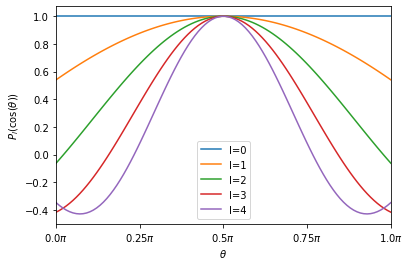

In [22]:
theta = np.linspace(0, np.pi, 100)
for i in range(5):
    plt.plot(theta, eval_legendre(i, np.cos(x)), label=f'l={i}')
plt.legend()
plt.xlabel(r'$\theta$')
plt.xlim(0, np.pi)
xticks = np.arange(5) * np.pi / 4
plt.xticks(xticks, [r'$' + f'{t / np.pi}' + r'\pi$' for t in xticks])
plt.ylabel(r'$P_l(\cos(\theta))$')
plt.show()

## Uniformly Charged Loop

When $r \ll a$:

$$\Phi(z) = \frac{Q}{\sqrt{z^2 + a^2}} = \frac{Q}{a}\bigg(1 - \frac{1}{2} \bigg(\frac{z}{a}\bigg)^2 + \frac{3}{8} \bigg(\frac{z}{a}\bigg)^4 - \dots \bigg)$$

$$\Phi(r,\theta) = \frac{Q}{a}\bigg(1 - \frac{1}{2} \bigg(\frac{r}{a}\bigg)^2 P_2(\cos(\theta)) + \frac{3}{8} \bigg(\frac{r}{a}\bigg)^4 P_4(\cos(\theta)) - \dots \bigg)$$

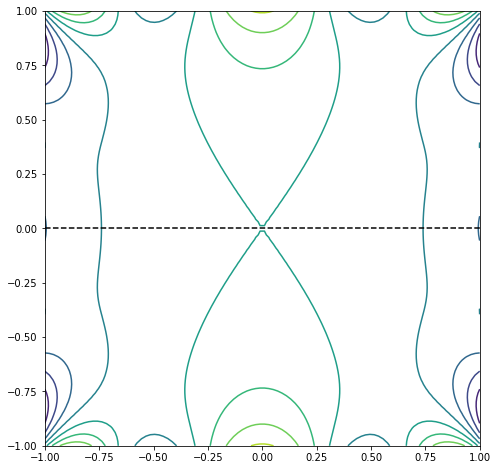

In [137]:
n_points = 100
Q = 1
a = 1
f = 1

end = a * f
x = np.linspace(-end, end, n_points)
z = np.linspace(-end, end, n_points)
X, Z = np.meshgrid(x, z)
R = np.sqrt(X**2 + Z**2)
Theta = np.arctan2(Z, X)

Phi = Q / a * (
    1 
  - 1/2 * (R/a)**2 * P(2, np.cos(Theta))
  + 3/8 * (R/a)**4 * P(4, np.cos(Theta))
  - 5/16 * (R/a)**6 * P(6, np.cos(Theta))
  + 35/128 * (R/a)**8 * P(8, np.cos(Theta))
  - 63/256 * (R/a)**10 * P(10, np.cos(Theta))
)

plt.figure(figsize=(8,8))
#levels = np.array([10**pw for pw in np.linspace(-5, 5, 50)])
#levels = sorted(list(-levels) + list(levels))
plt.contour(X, Z, Phi)#, levels=levels)

loop = np.linspace(-a, a, 100)
plt.plot(loop, 0 * loop, c='k', linestyle='--')

plt.axis('square')
plt.show()

When $r \gg a$:

$$\Phi(z) = \frac{Q}{\sqrt{z^2 + a^2}} = \frac{Q}{z}\bigg(1 - \frac{1}{2} \bigg(\frac{a}{z}\bigg)^2 + \frac{3}{8} \bigg(\frac{a}{z}\bigg)^4 - \dots \bigg)$$

$$\Phi(r,\theta) = \frac{Q}{r}\bigg(1 - \frac{1}{2} \bigg(\frac{a}{r}\bigg)^2 P_2(\cos(\theta)) + \frac{3}{8} \bigg(\frac{a}{r}\bigg)^4 P_4(\cos(\theta)) - \dots \bigg)$$

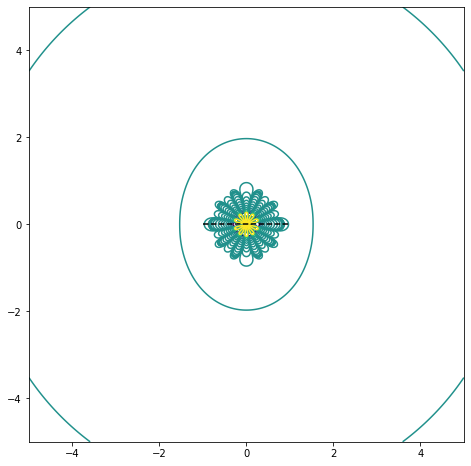

In [138]:
n_points = 1000
Q = 1
a = 1
f = 5

end = a * f
x = np.linspace(-end, end, n_points)
z = np.linspace(-end, end, n_points)
X, Z = np.meshgrid(x, z)
R = np.sqrt(X**2 + Z**2)
Theta = np.arctan2(Z, X)

Phi = Q / R * (
    1 
  - 1/2 * (a/R)**2 * P(2, np.cos(Theta))
  + 3/8 * (a/R)**4 * P(4, np.cos(Theta))
  - 5/16 * (a/R)**6 * P(6, np.cos(Theta))
  + 35/128 * (a/R)**8 * P(8, np.cos(Theta))
  - 63/256 * (a/R)**10 * P(10, np.cos(Theta))
)


plt.figure(figsize=(8,8))
levels = np.array([10**pw for pw in np.linspace(-5, 5, 20)])
levels = sorted(list(-levels) + list(levels))
plt.contour(X, Z, Phi, levels=levels)

loop = np.linspace(-a, a, 100)
plt.plot(loop, 0 * loop, c='k', linestyle='--')

plt.axis('square')
plt.show()

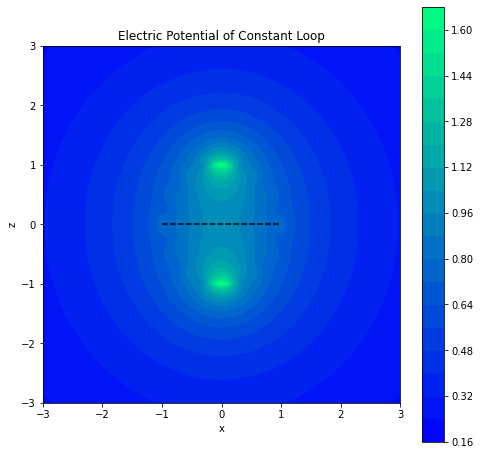

In [142]:
n_points = 1000
Q = 1
a = 1
f = 3

end = a * f
x = np.linspace(-end, end, n_points)
z = np.linspace(-end, end, n_points)
X, Z = np.meshgrid(x, z)
R = np.sqrt(X**2 + Z**2)
Theta = np.arctan2(Z, X)

Phi = np.zeros(R.shape)

R_in = R[R < a]
Theta_in = Theta[R < a]
Phi_in = Q / a * (
    1 
  - 1/2 * (R_in/a)**2 * P(2, np.cos(Theta_in))
  + 3/8 * (R_in/a)**4 * P(4, np.cos(Theta_in))
  - 5/16 * (R_in/a)**6 * P(6, np.cos(Theta_in))
  + 35/128 * (R_in/a)**8 * P(8, np.cos(Theta_in))
  - 63/256 * (R_in/a)**10 * P(10, np.cos(Theta_in))
  + 231/1024 * (R_in/a)**12 * P(12, np.cos(Theta_in))
)

R_out = R[R >= a]
Theta_out = Theta[R >= a]
# terms = [(-1)**n * max(1, (2*n - 1) / 2**n) * (a/R_out)**(2*n) * P(2*n, np.cos(Theta_out) for n in range(n_max)]
Phi_out = Q / R_out * (
    1 
  - 1/2 * (a/R_out)**2 * P(2, np.cos(Theta_out))
  + 3/8 * (a/R_out)**4 * P(4, np.cos(Theta_out))
  - 5/16 * (a/R_out)**6 * P(6, np.cos(Theta_out))
  + 35/128 * (a/R_out)**8 * P(8, np.cos(Theta_out))
  - 63/256 * (a/R_out)**10 * P(10, np.cos(Theta_out))
  + 231/1024 * (a/R_out)**12 * P(12, np.cos(Theta_out))
)

Phi[R < a] = Phi_in
Phi[R >= a] = Phi_out

plt.figure(figsize=(8,8))
levels = np.array([10**pw for pw in np.linspace(-5, 5, 100)])
levels = sorted(list(-levels) + list(levels))
plt.contourf(X, Z, Phi, 20, cmap='winter')

loop = np.linspace(-a, a, 100)
plt.plot(loop, 0 * loop, c='k', linestyle='--')

plt.axis('square')
plt.title(r'Electric Potential of Constant Loop')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()
plt.show()

## Opposite-Potential Hemispheres

When $r < a$:

$$\Phi(r,\theta) = \frac{Q}{a}\bigg(\frac{3}{2} \bigg(\frac{r}{a}\bigg) P_1(\cos(\theta)) - \frac{7}{8} \bigg(\frac{r}{a}\bigg)^3 P_3(\cos(\theta)) + \frac{11}{16} \bigg(\frac{r}{a}\bigg)^5 P_5(\cos(\theta)) - \dots \bigg)$$

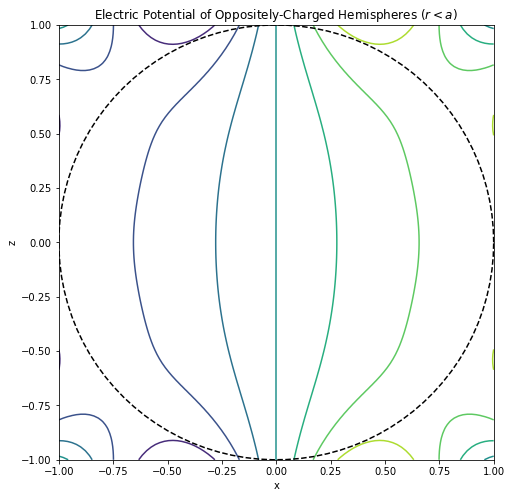

In [106]:
n_points = 100
Q = 1
a = 1
f = 1

end = a * f
x = np.linspace(-end, end, n_points)
z = np.linspace(-end, end, n_points)
X, Z = np.meshgrid(x, z)
R = np.sqrt(X**2 + Z**2)
Theta = np.arctan2(Z, X)

Phi_in = Q / a * (
  + 3/2 * (R/a)**1 * P(1, np.cos(Theta))
  - 7/8 * (R/a)**3 * P(3, np.cos(Theta))
  + 11/16 * (R/a)**5 * P(5, np.cos(Theta))
  - 13/32 * (R/a)**7 * P(7, np.cos(Theta))
)

plt.figure(figsize=(8,8))
#levels = np.array([10**pw for pw in np.linspace(-5, 5, 50)])
#levels = sorted(list(-levels) + list(levels))
plt.contour(X, Z, Phi_in)#, levels=levels)

theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), c='k', linestyle='--')

plt.axis('square')
plt.title(r'Electric Potential of Oppositely-Charged Hemispheres ($r < a$)')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

When $r > a$:

$$\Phi(r,\theta) = \frac{Q}{r}\bigg(\frac{3}{2} \bigg(\frac{a}{r}\bigg) P_1(\cos(\theta)) - \frac{7}{8} \bigg(\frac{a}{r}\bigg)^3 P_3(\cos(\theta)) + \frac{11}{16} \bigg(\frac{a}{r}\bigg)^5 P_5(\cos(\theta)) - \dots \bigg)$$

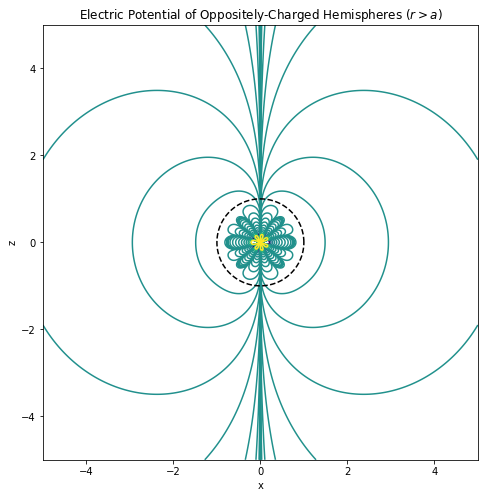

In [107]:
n_points = 1000
Q = 1
a = 1
f = 5

end = a * f
x = np.linspace(-end, end, n_points)
z = np.linspace(-end, end, n_points)
X, Z = np.meshgrid(x, z)
R = np.sqrt(X**2 + Z**2)
Theta = np.arctan2(Z, X)

Phi_out = Q / R * (
  + 3/2 * (a/R)**1 * P(1, np.cos(Theta))
  - 7/8 * (a/R)**3 * P(3, np.cos(Theta))
  + 11/16 * (a/R)**5 * P(5, np.cos(Theta))
  - 13/32 * (a/R)**7 * P(7, np.cos(Theta))
)

plt.figure(figsize=(8,8))
levels = np.array([10**pw for pw in np.linspace(-5, 5, 20)])
levels = sorted(list(-levels) + list(levels))
plt.contour(X, Z, Phi_out, levels=levels)

theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), c='k', linestyle='--')

plt.axis('square')
plt.title(r'Electric Potential of Oppositely-Charged Hemispheres ($r > a$)')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

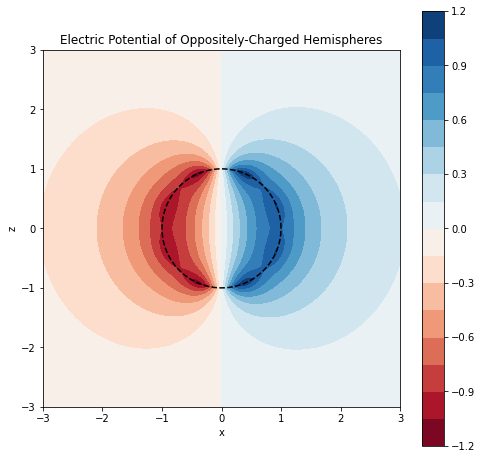

In [144]:
n_points = 1000
Q = 1
a = 1
f = 3

end = a * f
x = np.linspace(-end, end, n_points)
z = np.linspace(-end, end, n_points)
X, Z = np.meshgrid(x, z)
R = np.sqrt(X**2 + Z**2)
Theta = np.arctan2(Z, X)

Phi = np.zeros(R.shape)

R_in = R[R < a]
Theta_in = Theta[R < a]
Phi_in = Q / a * (
  + 3/2 * (R_in/a)**1 * P(1, np.cos(Theta_in))
  - 7/8 * (R_in/a)**3 * P(3, np.cos(Theta_in))
  + 11/16 * (R_in/a)**5 * P(5, np.cos(Theta_in))
  - 13/32 * (R_in/a)**7 * P(7, np.cos(Theta_in))
)

R_out = R[R >= a]
Theta_out = Theta[R >= a]
# terms = [(-1)**n * (2*n - 1) / 2**n * (a/R_out)**(2*n) * P(2*n, np.cos(Theta_out) for n in range(n_max)]
Phi_out = Q / R_out * (
  + 3/2 * (a/R_out)**1 * P(1, np.cos(Theta_out))
  - 7/8 * (a/R_out)**3 * P(3, np.cos(Theta_out))
  + 11/16 * (a/R_out)**5 * P(5, np.cos(Theta_out))
  - 13/32 * (a/R_out)**7 * P(7, np.cos(Theta_out))
)

Phi[R < a] = Phi_in
Phi[R >= a] = Phi_out

plt.figure(figsize=(8,8))
plt.contourf(X, Z, Phi, 20, cmap='RdBu')

theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), c='k', linestyle='--')

plt.axis('square')
plt.title(r'Electric Potential of Oppositely-Charged Hemispheres')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()
plt.show()

## Rectangular Bar with Constant Potential at End

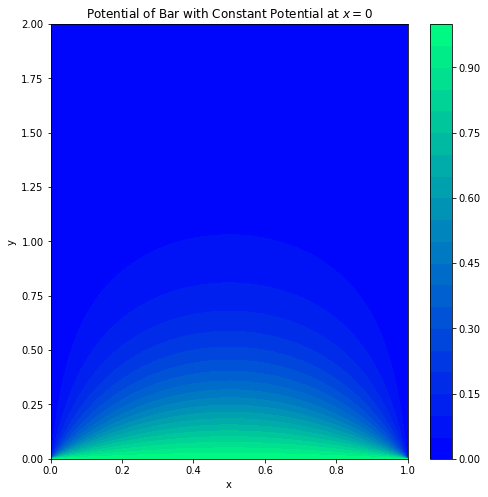

In [147]:
n_points = 1000
V = 1
a = 1
scale = 2

x = np.linspace(0, a, n_points)
y = np.linspace(0, a*scale, n_points)
X, Y = np.meshgrid(x, y)

Phi = 2*V/np.pi * np.arctan2(np.sin(np.pi*X/a), np.sinh(np.pi*Y/a))

plt.figure(figsize=(8,8))
plt.contourf(X, Y, Phi, 20, cmap='winter')

# plt.axis('square')
plt.title(r'Potential of Bar with Constant Potential at $x=0$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()